# Veri Hazırlama

Kütüphaneler

In [40]:
import torch
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from torch.utils.data import (Dataset, DataLoader)
from skimage import io 

import warnings

warnings.filterwarnings("ignore")


Veri

In [41]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform = None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir  = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index,0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index,1]))

        if self.transform:
            image = self.transform(image)
        
        return(image, y_label)

Veri Hazırlama

In [42]:

dataset = veri(csv_file="../../veriler/f1_classification/f111.csv", root_dir="../../veriler/f1_classification", transform=transforms.Compose([
    
    transforms.ToTensor(), 
    transforms.Resize(size=(28,28)),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
]))


In [43]:
dataset

Veri Ön İşleme

In [44]:
train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)


Veri Görselleştirme

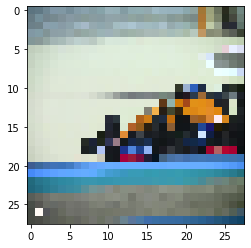

Mclaren
torch.Size([1, 3, 28, 28])


In [45]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 1

classes = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]

def imshow(img):

    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())
